# **Visualising Data of Netflix**

> **Step 1:** Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> **Step 2:** Load the dataset

In [2]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


> **Step 3:** Check the null and duplicate values and handle those values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.shape

(8807, 12)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data = data.dropna(subset=['type','release_year','rating','country','duration'])

*dropna() in Pandas removes rows (by default) that contain missing values (NaN).*

*subset=[] Instead of checking all columns, Pandas will look only at these specified columns.*
*If any of the column which is written in the subset contain a missing value (NaN) in a row, that entire row will be dropped.* 

> **Step 4 :** Now analyse the data

## Number of Movies and TV Shows on Netflix

In [8]:
type_counts = data['type'].value_counts()
type_counts

type
Movie      5687
TV Show    2283
Name: count, dtype: int64

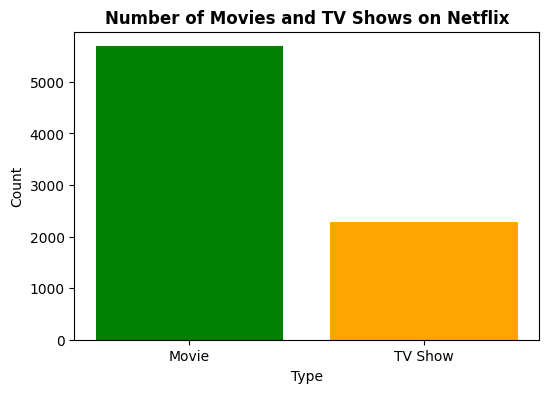

In [9]:
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['green','orange'])
plt.title("Number of Movies and TV Shows on Netflix",fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig('movies_vs_tvshows.png')
plt.show()

## Percentage of Content Ratings

In [10]:
rating_counts = data['rating'].value_counts()
rating_counts

rating
TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

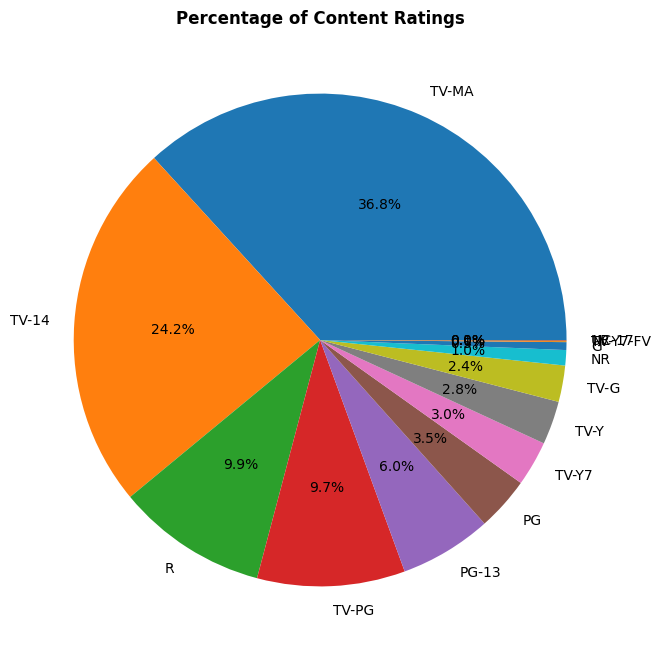

In [11]:
plt.figure(figsize=(15,8))
plt.pie(rating_counts,labels=rating_counts.index,autopct ="%1.1f%%")
plt.title("Percentage of Content Ratings", fontweight='bold')
plt.savefig('content_ratings.png')
plt.show()

## Release Year vs no of Shows

In [12]:
release_counts = data['release_year'].value_counts().sort_index()
release_counts

release_year
1942       2
1943       3
1944       3
1945       4
1946       2
        ... 
2017     965
2018    1038
2019     913
2020     852
2021     383
Name: count, Length: 73, dtype: int64

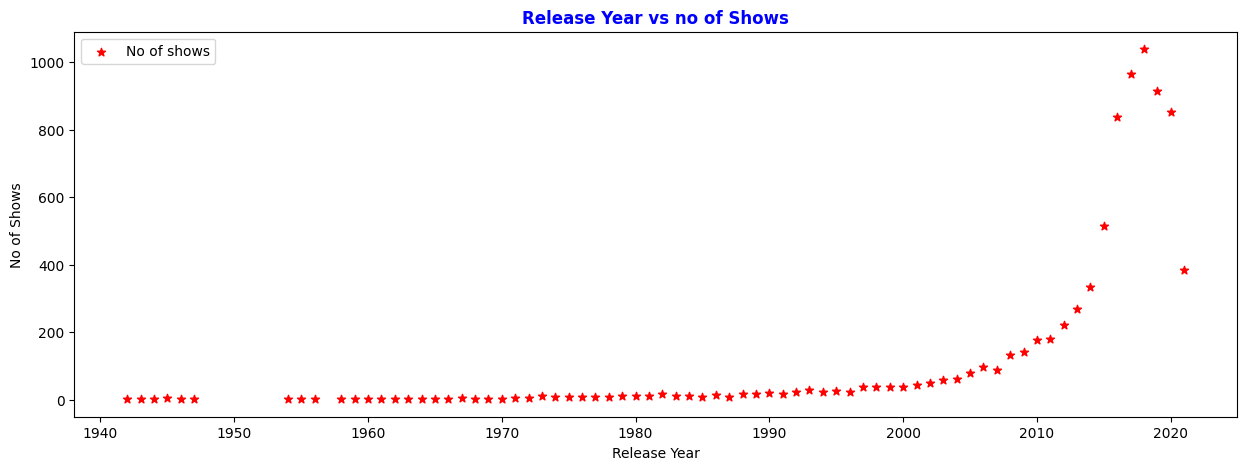

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(release_counts.index,release_counts.values,color='red',marker='*',label='No of shows')
plt.title("Release Year vs no of Shows",color="blue",fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('No of Shows')
plt.legend()
plt.savefig('Release_Year_vs_no_of_Shows.png')
plt.show()

## Top 10 Countries by no of Shows

In [14]:
country_counts = data['country'].value_counts().head(10)
country_counts

country
United States     2815
India              972
United Kingdom     419
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

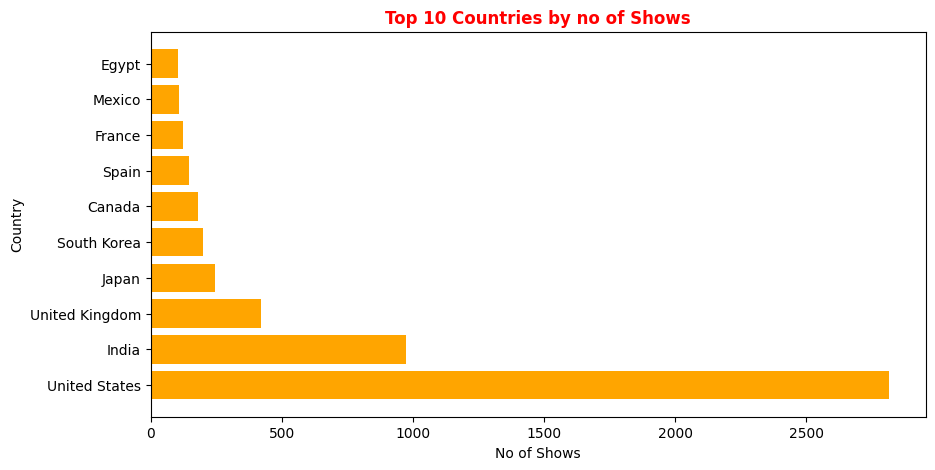

In [15]:
plt.figure(figsize=(10,5))
plt.barh(country_counts.index,country_counts.values,color='orange')
plt.title("Top 10 Countries by no of Shows",color="red",fontweight='bold')
plt.xlabel('No of Shows')
plt.ylabel('Country')
plt.savefig('County_vs_noOfShows.png')
plt.show()